In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns

In [34]:
df = pd.read_csv('kindle_reviews.csv', keep_default_na=False)
df = df.rename(columns={'Unnamed: 0': 'Id'})

print('Data Set Shape = {}'.format(df.shape))
print('Data Set Memory Usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))
print(df.columns)

Data Set Shape = (982619, 10)
Data Set Memory Usage = 74.97 MB
Index(['Id', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


# Cardinality

In [4]:
print("Number of unique books: {}".format(df['asin'].nunique()))
print("Number of unique reviewers: {}".format(df['reviewerID'].nunique()))

Number of unique books: 61934
Number of unique reviewers: 68223


In [5]:
reviewsperbook = df.groupby('asin')['overall'].value_counts(dropna=False)

#Build stacked bar histogram if possible

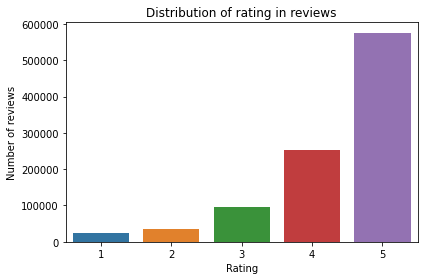

In [6]:
distribution = df['overall'].value_counts(dropna=False)

fig = sns.barplot(distribution.index, distribution)
fig.set(xlabel='Rating', ylabel='Number of reviews', title="Distribution of rating in reviews")
fig.get_figure().tight_layout()
fig.get_figure().savefig("Distributuon_of_rating.png")

# Meta Features

In [55]:
#remove text with images
df = df[~df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)]

print(df.count())

df['punctuation'] = df['reviewText'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

Id                982590
asin              982590
helpful           982590
overall           982590
reviewText        982590
reviewTime        982590
reviewerID        982590
reviewerName      982590
summary           982590
unixReviewTime    982590
punctuation       982590
dtype: int64
Id                982590
asin              982590
helpful           982590
overall           982590
reviewText        982590
reviewTime        982590
reviewerID        982590
reviewerName      982590
summary           982590
unixReviewTime    982590
punctuation       982590
dtype: int64


Id                962627
asin              962627
helpful           962627
overall           962627
reviewText        962627
reviewTime        962627
reviewerID        962627
reviewerName      962627
summary           962627
unixReviewTime    962627
punctuation       962627
dtype: int64


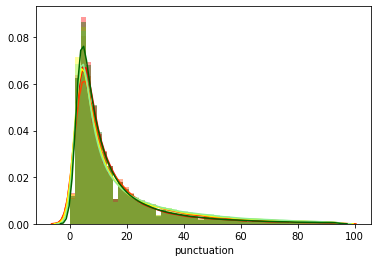

In [54]:
df_outliers = df[np.abs(df['punctuation']-df['punctuation'].mean())<=(3*df['punctuation'].std())]

rating1 = df_outliers['overall']==1
rating2 = df_outliers['overall']==2
rating3 = df_outliers['overall']==3
rating4 = df_outliers['overall']==4
rating5 = df_outliers['overall']==5

#Detects HTML reviews
#print(df.loc[df['punctuation'].argmax()]['reviewText'])
#print(df_outliers['punctuation'].max())
print(df_outliers.count())
#print(df[df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)].count())
#print(df.loc[df['Id'] == 361]['reviewText'].to_string())

sns.distplot(df_outliers.loc[rating1]['punctuation'], label='Rating 1', color='red')
sns.distplot(df_outliers.loc[rating2]['punctuation'], label='Rating 2', color='orangered')
sns.distplot(df_outliers.loc[rating3]['punctuation'], label='Rating 3', color='yellow')
sns.distplot(df_outliers.loc[rating4]['punctuation'], label='Rating 4', color='lightgreen')
sns.distplot(df_outliers.loc[rating5]['punctuation'], label='Rating 5', color='darkgreen')